In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from datetime import datetime 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../datasets/accumulate_by_country.csv')

### Deteksi NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       232 non-null    object 
 1   Confirmed            232 non-null    float64
 2   Active               232 non-null    float64
 3   Recovered            232 non-null    float64
 4   Deaths               232 non-null    float64
 5   Case-Fatality_Ratio  186 non-null    float64
 6   Case-Recovery_Ratio  186 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.8+ KB


> Pada feature Case_Fatality_Ratio dan Case_Recovered_Ratio terdapat nilai null

In [4]:
df.isna()

,Country_Region,Confirmed,Active,Recovered,Deaths,Case-Fatality_Ratio,Case-Recovery_Ratio
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True
2,False,False,False,False,False,True,True
3,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
227,False,False,False,False,False,True,True
228,False,False,False,False,False,True,True
229,False,False,False,False,False,True,True
230,False,False,False,False,False,True,True


> Jika dieksplorasi, ternyata null value hanya terdapat pada data yang bernilai feature 0. Maka nilai null hanya akan diisi 0

### Pengisian nilai null

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       232 non-null    object 
 1   Confirmed            232 non-null    float64
 2   Active               232 non-null    float64
 3   Recovered            232 non-null    float64
 4   Deaths               232 non-null    float64
 5   Case-Fatality_Ratio  232 non-null    float64
 6   Case-Recovery_Ratio  232 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.8+ KB


> Nilai null sudah terisi

In [7]:
df.sort_values(by='Active', ascending=False).head(10)

,Country_Region,Confirmed,Active,Recovered,Deaths,Case-Fatality_Ratio,Case-Recovery_Ratio
4,US,6629899.0,6433143.0,0.0,196760.0,2.967768,0.000000
92,India,5020359.0,995933.0,3942360.0,82066.0,1.634664,78.527452
42,Brazil,4419083.0,439513.0,3845464.0,134106.0,3.034702,87.019502
164,Spain,614360.0,433741.0,150376.0,30243.0,4.922684,24.476854
17,United Kingdom,380677.0,336714.0,2190.0,41773.0,10.973345,0.575291
10,France,443869.0,321193.0,91293.0,31056.0,6.996659,20.567555
147,Russia,1075485.0,169175.0,887457.0,18853.0,1.752977,82.516911
26,Argentina,589012.0,128633.0,448263.0,12116.0,2.057004,76.104222
141,Peru,738020.0,126340.0,580753.0,30927.0,4.190537,78.690686
53,Colombia,736377.0,102821.0,610078.0,23478.0,3.188313,82.848595


#### Gambaran umum Data set

In [8]:
df.describe()

,Confirmed,Active,Recovered,Deaths,Case-Fatality_Ratio,Case-Recovery_Ratio
count,2.320000e+02,2.320000e+02,2.320000e+02,232.000000,232.000000,232.000000
mean,1.282858e+05,4.794853e+04,7.628656e+04,4049.366379,2.135696,58.620179
std,6.260948e+05,4.293570e+05,3.745153e+05,17856.111771,2.833248,36.219695
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.327500e+02,4.750000e+00,5.300000e+01,0.000000,0.000000,24.444205
50%,4.905000e+03,8.900000e+02,2.376500e+03,82.500000,1.647840,73.847548
75%,4.684825e+04,6.881750e+03,2.450875e+04,743.750000,2.955871,88.616480
max,6.629899e+06,6.433143e+06,3.942360e+06,196760.000000,28.875681,100.000000


> jika dilihat banyak data yang cukup menarik diatas, diantaranya nilai max case_fatality_ratio berada di angka 28,9% dan nilai max case_recovered_ratio di angka 100%. Juga nilai rata-rata case_fatality_ratio yang berada di 2,14 dan rata-rata case_recovered_ratio 58,5.

### Melihat kolerasi antar feature melalui visualisasi
- Global:

<Figure size 864x576 with 0 Axes>

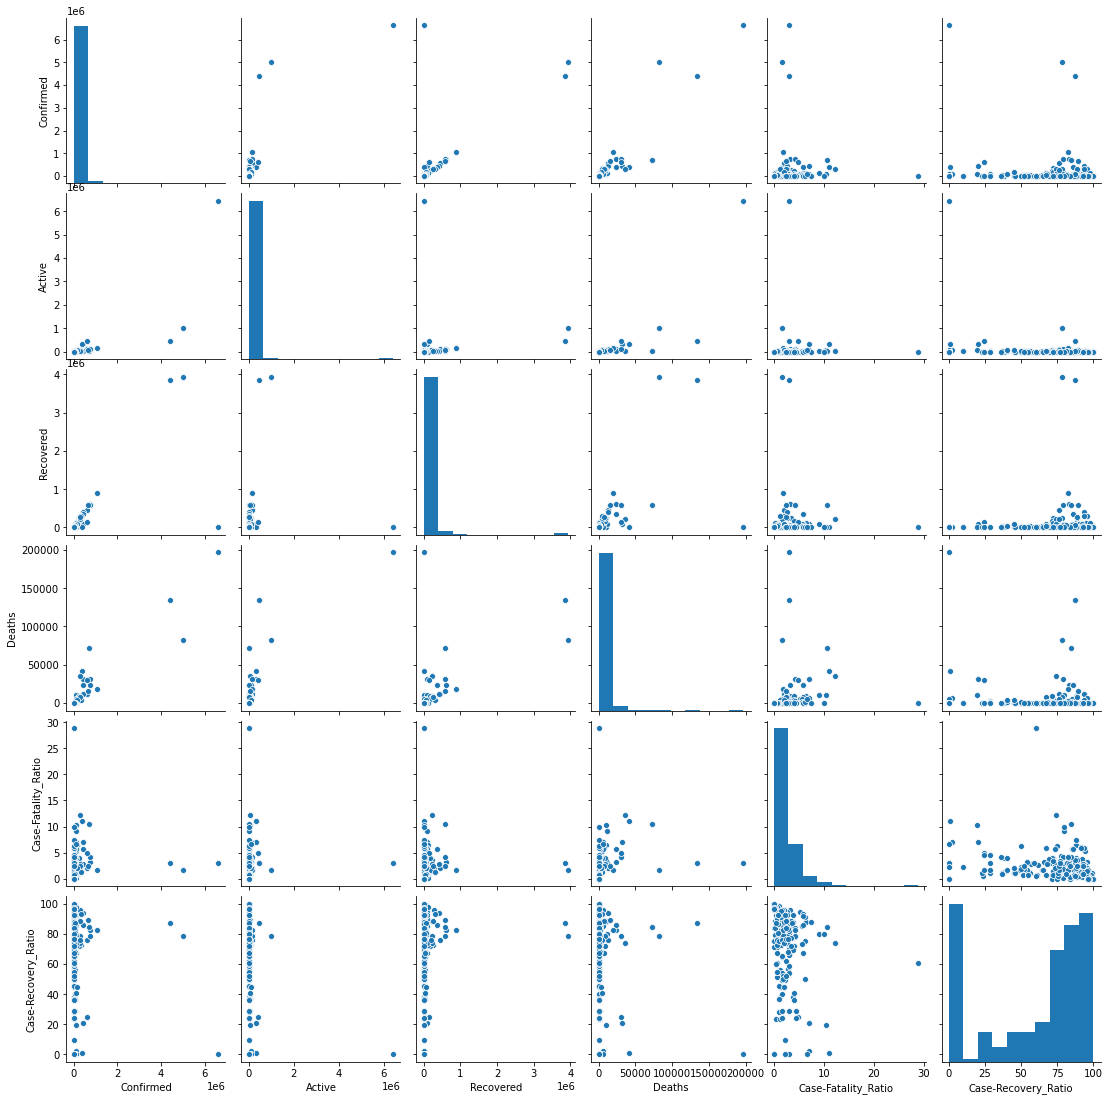

In [9]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df,palette='cubehelix')

> masih terlalu banyak outlier, sehingga kami memutuskan untuk mempersempit object untuk dianalisa menjadi hanya 10 negara dengan nilai active tertinggi

- Top 10:

In [10]:
covid_top10 = df.sort_values(by='Active', ascending=False).head(10)
covid_top10

,Country_Region,Confirmed,Active,Recovered,Deaths,Case-Fatality_Ratio,Case-Recovery_Ratio
4,US,6629899.0,6433143.0,0.0,196760.0,2.967768,0.000000
92,India,5020359.0,995933.0,3942360.0,82066.0,1.634664,78.527452
42,Brazil,4419083.0,439513.0,3845464.0,134106.0,3.034702,87.019502
164,Spain,614360.0,433741.0,150376.0,30243.0,4.922684,24.476854
17,United Kingdom,380677.0,336714.0,2190.0,41773.0,10.973345,0.575291
10,France,443869.0,321193.0,91293.0,31056.0,6.996659,20.567555
147,Russia,1075485.0,169175.0,887457.0,18853.0,1.752977,82.516911
26,Argentina,589012.0,128633.0,448263.0,12116.0,2.057004,76.104222
141,Peru,738020.0,126340.0,580753.0,30927.0,4.190537,78.690686
53,Colombia,736377.0,102821.0,610078.0,23478.0,3.188313,82.848595


<Figure size 864x576 with 0 Axes>

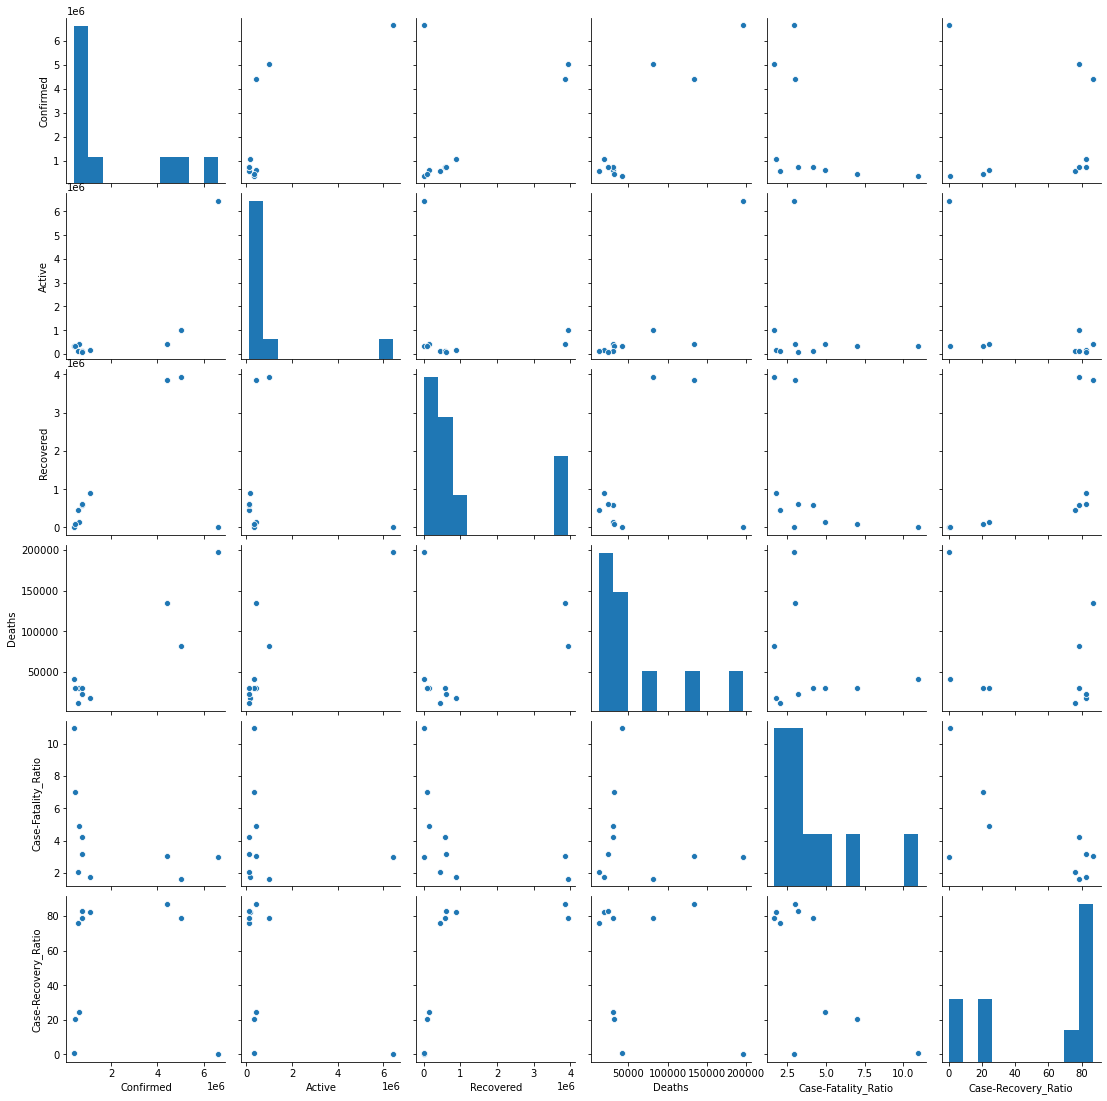

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(data=covid_top10,palette='cubehelix')

> Dari visualisasi di atas masih terdapat outlier dan data memang tidak terdistribusi normal

### Deteksi outlier menggunakan IQR

In [12]:
Q1 = covid_top10['Active'].describe()['25%']
Q3 = covid_top10['Active'].describe()['75%']

Iqr = int(Q3) - int(Q1) 
upper = Q3 + 1.5 * Iqr
lower = Q1 - 1.5 * Iqr

In [13]:
len(covid_top10[(covid_top10['Active'] >= lower) & (covid_top10['Active'] <= upper)]['Active'])

8

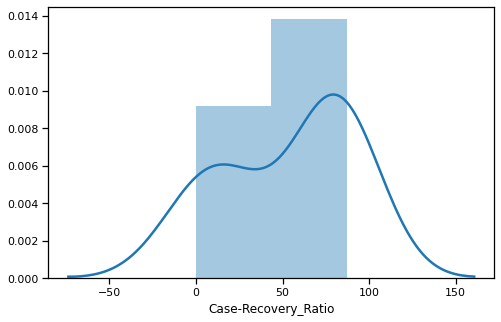

In [14]:
plt.figure(figsize=(8,5))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.distplot(covid_top10[(covid_top10['Case-Recovery_Ratio'] >= lower) & (covid_top10['Case-Recovery_Ratio'] <= upper)]['Case-Recovery_Ratio'])

out_like = covid_top10[(covid_top10['Case-Recovery_Ratio'] >= lower) & (covid_top10['Case-Recovery_Ratio'] <= upper)]['Case-Recovery_Ratio'].index

> Meski sudah dihilangkan outliernya, grafik masih menunjukan bahwa data tidak dalam bentuk bell shape yang menandakan distribusi data memang tidak normal

In [15]:
covid_not = df.loc[out_like].copy()
covid_not.head(10)

,Country_Region,Confirmed,Active,Recovered,Deaths,Case-Fatality_Ratio,Case-Recovery_Ratio
4,US,6629899.0,6433143.0,0.0,196760.0,2.967768,0.000000
92,India,5020359.0,995933.0,3942360.0,82066.0,1.634664,78.527452
42,Brazil,4419083.0,439513.0,3845464.0,134106.0,3.034702,87.019502
164,Spain,614360.0,433741.0,150376.0,30243.0,4.922684,24.476854
17,United Kingdom,380677.0,336714.0,2190.0,41773.0,10.973345,0.575291
10,France,443869.0,321193.0,91293.0,31056.0,6.996659,20.567555
147,Russia,1075485.0,169175.0,887457.0,18853.0,1.752977,82.516911
26,Argentina,589012.0,128633.0,448263.0,12116.0,2.057004,76.104222
141,Peru,738020.0,126340.0,580753.0,30927.0,4.190537,78.690686
53,Colombia,736377.0,102821.0,610078.0,23478.0,3.188313,82.848595


### Eksplorasi data pada dataset yang sudah dihilangkan outlier-nya

In [16]:
covid_not.describe()

,Confirmed,Active,Recovered,Deaths,Case-Fatality_Ratio,Case-Recovery_Ratio
count,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,2.064714e+06,9.487206e+05,1.055823e+06,60137.800000,4.171865,53.132707
std,2.342063e+06,1.944966e+06,1.524289e+06,60463.232074,2.892040,36.799136
min,3.806770e+05,1.028210e+05,0.000000e+00,12116.000000,1.634664,0.000000
25%,5.953490e+05,1.387685e+05,1.060638e+05,25169.250000,2.284695,21.544880
50%,7.371985e+05,3.289535e+05,5.145080e+05,30991.500000,3.111507,77.315837
75%,3.583184e+06,4.380700e+05,8.181122e+05,71992.750000,4.739647,81.560355
max,6.629899e+06,6.433143e+06,3.942360e+06,196760.000000,10.973345,87.019502


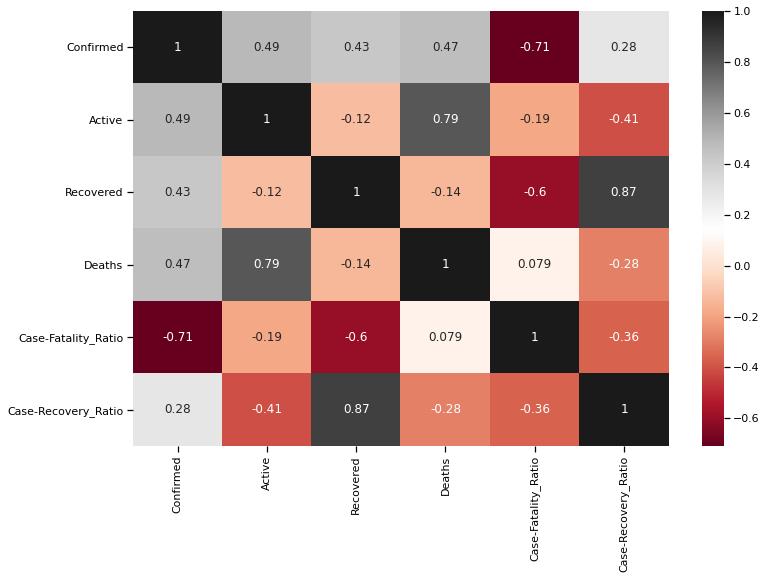

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(covid_not.corr('spearman'),annot=True,cmap='RdGy')

> Metode yang digunakan spearman, dikarenakan terlalu banyak outlier dan distribusi tidak normal

##  Independent T-test
### Hypothesis Testing 1
- Pengaruh Ratio Fatality Case(kematian) suatu negara terhadap kasus terkonfirmasi yang masih aktif

#### H0
- Tidak adanya pengaruh Ratio Fatality Case(kematian) suatu negara terhadap meninggalnya korban covid yang masih aktif terkonfirmasi

#### H1
- Adanya pengaruh Ratio Fatality Case(kematian) suatu negara terhadap meninggalnya korban covid yang masih aktif

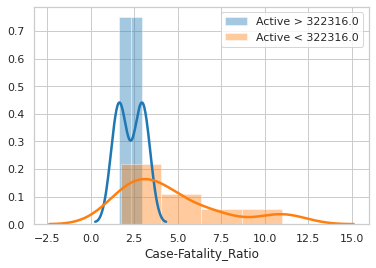

In [18]:
sns.set_style('whitegrid')
sns.distplot(covid_not[covid_not['Active'] > 943348.2]['Case-Fatality_Ratio'],label='Active > 322316.0')
sns.distplot(covid_not[covid_not['Active'] < 943348.2]['Case-Fatality_Ratio'],label='Active < 322316.0')
plt.legend()
plt.show()

In [19]:
from scipy.stats import ttest_ind

In [20]:
yes = covid_not[covid_not['Active'] > 943348.2]['Case-Fatality_Ratio']
no = covid_not[covid_not['Active']  < 943348.2]['Case-Fatality_Ratio']

In [21]:
result = ttest_ind(no,yes)
result

Ttest_indResult(statistic=1.025673626676097, pvalue=0.33505620634477296)

In [22]:
print('t-statistic : {}'.format(round(result[0],2)))
print('P-Value : {}'.format(result[1],2))

t-statistic : 1.03
P-Value : 0.33505620634477296


#### Kesimpulan
- Dikarenan p-value lebih besar dari significance level (0.05-->alpha), dapat kami simpulkan bahwa Hipotesis yang rumuskan dapat diterima.
- Sehingga dapat dibuktikan bahwa adanya pengaruh akan Ratio Fatality Case(kematian) suatu negara terhadap sembuhnya korban covid yang masih aktif.

### Done the normality test (Anderson)
- Anderson stat < critical value for accept H0 (reject H1) --> is normal distributed
- Anderson stat > critical value for rejecting H0 (accept H1) --> isn't normal distributed
- with significance level (5%)

In [23]:
from scipy.stats import anderson
def try_normal(data):
    result = {'Anderson' : {i : j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['statistic'] = anderson(data)[0]
    return result

In [24]:
try_normal(covid_not[covid_not['Active'] < 943348.2]['Case-Fatality_Ratio'])

{'Anderson': {15.0: 0.519,
  10.0: 0.591,
  5.0: 0.709,
  2.5: 0.827,
  1.0: 0.984,
  'statistic': 0.48507959492644126}}

In [25]:
result_anderson = anderson(covid_not[covid_not['Active'] < 943348.2]['Case-Fatality_Ratio'])

In [26]:
list(zip(result_anderson[2],result_anderson[1]))

[(15.0, 0.519), (10.0, 0.591), (5.0, 0.709), (2.5, 0.827), (1.0, 0.984)]

In [27]:
result_anderson[1]

array([0.519, 0.591, 0.709, 0.827, 0.984])

In [28]:
result_anderson[0]

0.48507959492644126

> Melalui pengujian Anderson terdapat keunikan dimana ternyata dataset dapat dinyatakan distribusi normal

### Hypothesis Testing 2
- Pengaruh Ratio kesembuhan suatu negara terhadap kasus terkonfirmasi yang masih aktif

#### H0
- Tidak adanya pengaruh  Ratio kesembuhan suatu negara suatu negara terhadap sembuhnya korban covid yang masih aktif terkonfirmasi

#### H1
- Adanya pengaruh akan  Ratio kesembuhan suatu negara suatu negara terhadap sembuhnya korban covid yang masih aktif

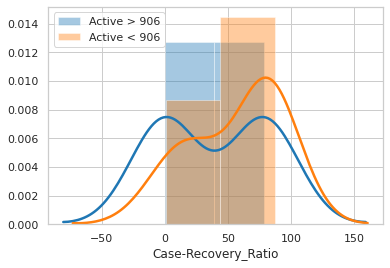

In [29]:
# sns.set_style('whitegrid')
# sns.distplot(covid[covid['Active'] > 47635.83]['Case_Recovered_Ratio'],label='>50%')
# sns.distplot(covid[covid['Active'] < 47635.83]['Case_Recovered_Ratio'],label='<50%')
# plt.legend()
# plt.show()
sns.set_style('whitegrid')
sns.distplot(covid_not[covid_not['Active'] > 943348.2]['Case-Recovery_Ratio'],label='Active > 906')
sns.distplot(covid_not[covid_not['Active'] < 943348.2]['Case-Recovery_Ratio'],label='Active < 906')
plt.legend()
plt.show()

In [30]:
yes = covid_not[covid_not['Active'] > 943348.2]['Case-Recovery_Ratio']
no = covid_not[covid_not['Active'] < 943348.2]['Case-Recovery_Ratio']

In [31]:
result = ttest_ind(no,yes)
result

Ttest_indResult(statistic=0.5732472748661883, pvalue=0.5822281067403559)

In [32]:
print('t-statistic : {}'.format(round(result[0],2)))
print('P-Value : {}'.format(result[1],2))

t-statistic : 0.57
P-Value : 0.5822281067403559


#### Kesimpulan
- Dikarenan p- value lebih besar dari significance level (0.05-->alpha), dapat kami simpulkan bahwa Hipotesis yang rumuskan dapat diterima.
- Sehingga dapat dibuktikan bahwa adanya pengaruh akan Ratio Fatality Case(kematian) suatu negara terhadap sembuhnya korban covid yang masih aktif.

- When the p-value higher then our significance level (alpha) it means to accept H0, reject H1
- When the p-value lower then our significance level (alpha) it means to rejct H0, accept H1

### Done the normality test (Anderson)
- Anderson stat < critical value for accept H0 (reject H1) --> is normal distributed
- Anderson stat > critical value for rejecting H0 (accept H1) --> isn't normal distributed
- with significance level (5%)

In [33]:
from scipy.stats import anderson
def try_normal(data):
    result = {'Anderson' : {i : j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['statistic'] = anderson(data)[0]
    return result

In [34]:
try_normal(covid_not[covid_not['Active'] < 943348.2]['Case-Recovery_Ratio'])

{'Anderson': {15.0: 0.519,
  10.0: 0.591,
  5.0: 0.709,
  2.5: 0.827,
  1.0: 0.984,
  'statistic': 0.8510625023077605}}

In [35]:
result_anderson = anderson(covid_not[covid_not['Active'] < 943348.2]['Case-Recovery_Ratio'])

In [36]:
list(zip(result_anderson[2],result_anderson[1]))

[(15.0, 0.519), (10.0, 0.591), (5.0, 0.709), (2.5, 0.827), (1.0, 0.984)]

In [37]:
result_anderson[1]

array([0.519, 0.591, 0.709, 0.827, 0.984])

In [38]:
result_anderson[0]

0.8510625023077605

> Melalui pengujian Anderson terdapat keunikan dimana ternyata dataset dapat dinyatakan distribusi normal pada significance value 0,01

### Kesimpulan Akhir:
- Dari keseluruhan dataset yang kami digunakan, dapat kami simpulkan bahwa dataset bersifat tidak terdistribusi normal dan memiliki banyak outlier dikarenakan ada beberapa titik menjadi pusat penyebaran data
- Dari dua hipotesa yang kami lakukan, dapat disimpulkan juga bahwa tidak terdapat korelasi yang cukup kuat antara variable jumlah kasus yang aktif (Feature Active) dengan Rasio Kasus Kematian (Case Fatality Ratio) maupun Rasio Kasus Sembuh (Case Recovered Ratio) 